# Business Understanding

For this project, we used the King County House Sales dataset calculations to advise future homeowners on what affects the price of a home.

# Data Understanding

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [130]:
# Parameters

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

plt.rcParams['figure.figsize'] = [12, 8]
#plt.rcParams['figure.dpi'] = 100
sns.set_palette("husl")

In [131]:
!wget https://raw.githubusercontent.com/dbvimpec/king_county_housing_analysis/refs/heads/main/data/kc_house_data.csv

--2025-07-14 06:06:16--  https://raw.githubusercontent.com/dbvimpec/king_county_housing_analysis/refs/heads/main/data/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2815526 (2.7M) [text/plain]
Saving to: ‘kc_house_data.csv.2’

kc_house_data.csv.2 100%[===================>]   2.68M  --.-KB/s    in 0.08s   

2025-07-14 06:06:16 (35.5 MB/s) - ‘kc_house_data.csv.2’ saved [2815526/2815526]



In [132]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [134]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,2376
view,63


## Data Preparation


In [135]:
# Creating copy of DateFrame, cleaning and preprocessing

df_clean = df.copy()
df_clean = df_clean.drop(['id', 'date', 'zipcode', 'lat', 'long',
                          'sqft_living15', 'sqft_lot15'], axis=1)
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0


In [136]:
# replacing '?' with Nan values

if df_clean['sqft_basement'].dtype == 'object':
    df_clean['sqft_basement'] = df_clean['sqft_basement'].replace('?', np.nan)
    df_clean['sqft_basement'] = pd.to_numeric(df_clean['sqft_basement'], errors='coerce')

In [137]:
# converitng categorical waterfront column to numeric values

df_clean['waterfront'] = df_clean['waterfront'].fillna('NO')
df_clean['waterfront'] = df_clean['waterfront'].map({'YES': 1, 'NO': 0})
df_clean['waterfront'] = df_clean['waterfront'].fillna(0) # fixes any unmapped values

In [138]:
# Replacing any missing/null values

df_clean['view'] = df_clean['view'].replace(0, 'NONE')
df_clean['view'] = df_clean['view'].fillna('NONE')

In [139]:
# Creates a new boolean column that's true if the property was renovated
# Replacing missing renovation years with zero, indicating no renovation

df_clean['was_renovated'] = (df_clean['yr_renovated'].notna()) & (df_clean['yr_renovated'] > 0)
df_clean['was_renovated'] = df_clean['was_renovated'].fillna(0)

In [140]:
# Extracts numeric grade (construction quality rating)

if df_clean['grade'].dtype == 'object':
    df_clean['grade_numeric'] = df_clean['grade'].str.extract('(\d+)').astype(int)
else:
    df_clean['grade_numeric'] = df_clean['grade']

In [141]:
# Filling in missing values

df_clean['sqft_basement'] = df_clean['sqft_basement'].fillna(0)

In [142]:
# Create additional quality features

df_clean['home_age'] = 2025 - df_clean['yr_built']
df_clean['years_since_renovation'] = np.where(df_clean['was_renovated'],
                                              2025 - df_clean['yr_renovated'],
                                              df_clean['home_age'])

In [143]:
# Calculates the price per square foot

df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living']

In [144]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,was_renovated,grade_numeric,home_age,years_since_renovation,price_per_sqft
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,0.0,False,7,70,70.0,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,2170,400.0,1951,1991.0,True,7,74,34.0,209.338521
2,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,770,0.0,1933,NaN,False,6,92,92.0,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,False,7,60,60.0,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,1680,0.0,1987,0.0,False,8,38,38.0,303.571429


# Exploratory Data Analysis

Analyze how construction quality and material-related / features affects homes prices


### Construction Quality

In [145]:
grade_analysis = df_clean.groupby('grade_numeric')['price'].agg(['count', 'mean', 'median']).round(0)
grade_analysis.columns = ['Count', 'Mean Price', 'Median Price']
baseline_price = grade_analysis['Mean Price'].min()
grade_analysis['Price_Premium'] = (((grade_analysis['Mean Price'] - baseline_price) /
                                   baseline_price) * 100).round(1)
grade_analysis

,Count,Mean Price,Median Price,Price_Premium
grade_numeric,,,,
3,1,262000.0,262000.0,23.6
4,27,212002.0,200000.0,0.0
5,242,248524.0,228700.0,17.2
6,2038,301917.0,275276.0,42.4
7,8974,402595.0,375000.0,89.9
8,6065,542987.0,510000.0,156.1
9,2615,773738.0,720000.0,265.0
10,1134,1072347.0,914327.0,405.8
11,399,1497792.0,1280000.0,606.5


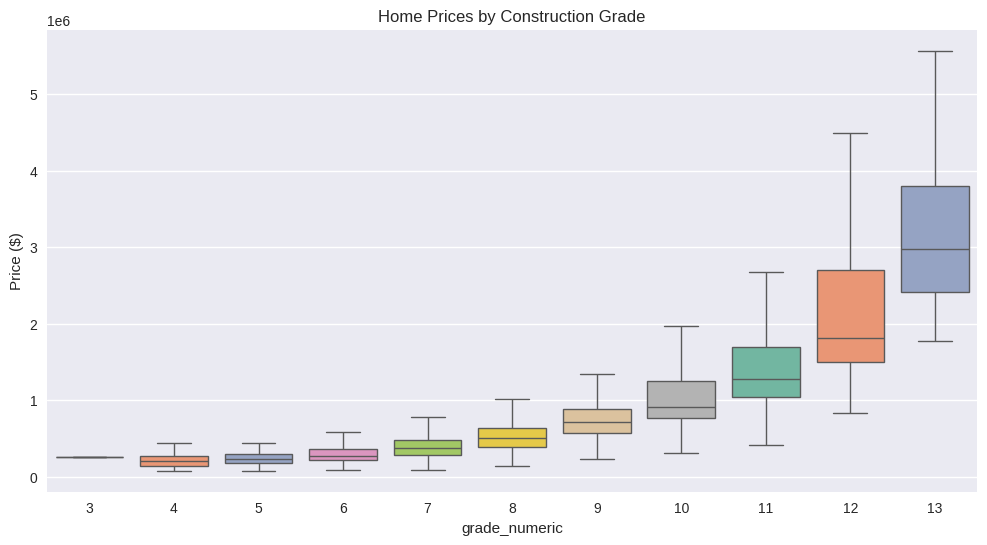

In [176]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_clean, x='grade_numeric', y='price', ax=ax, palette='Set2', showfliers=False)
ax.set_title('Home Prices by Construction Grade')
ax.set_ylabel('Price ($)');


In [147]:
grade_impact = grade_analysis['Mean Price'].pct_change().fillna(0) * 100
grade_impact.sort_values(ascending=False)
grade_impact

,Mean Price
grade_numeric,
3,0.000000
4,-19.083206
5,17.227196
6,21.484042
7,33.346251
8,34.871769
9,42.496598
10,38.593038
11,39.674191


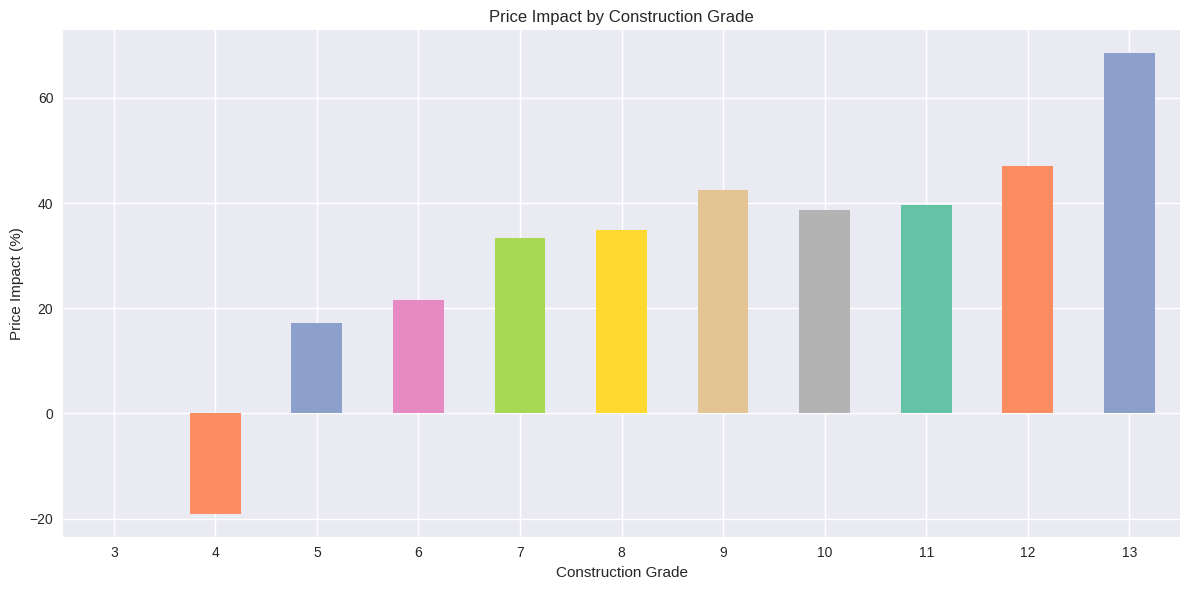

In [148]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2", len(grade_impact))
grade_impact.plot(kind='bar', color=colors)
plt.title('Price Impact by Construction Grade')
plt.ylabel('Price Impact (%)')
plt.xlabel('Construction Grade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

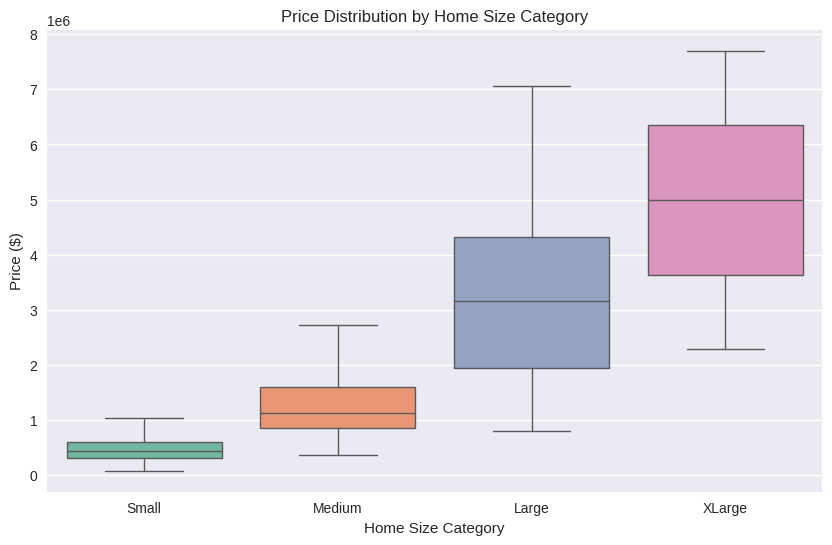

In [149]:
# Create size categories for boxplot
df_clean['size_category'] = pd.cut(df_clean['sqft_living'],
                                  bins=4,
                                  labels=['Small', 'Medium', 'Large', 'XLarge'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='size_category', y='price', palette='Set2', showfliers=False)
plt.title('Price Distribution by Home Size Category')
plt.xlabel('Home Size Category')
plt.ylabel('Price ($)')
plt.show()

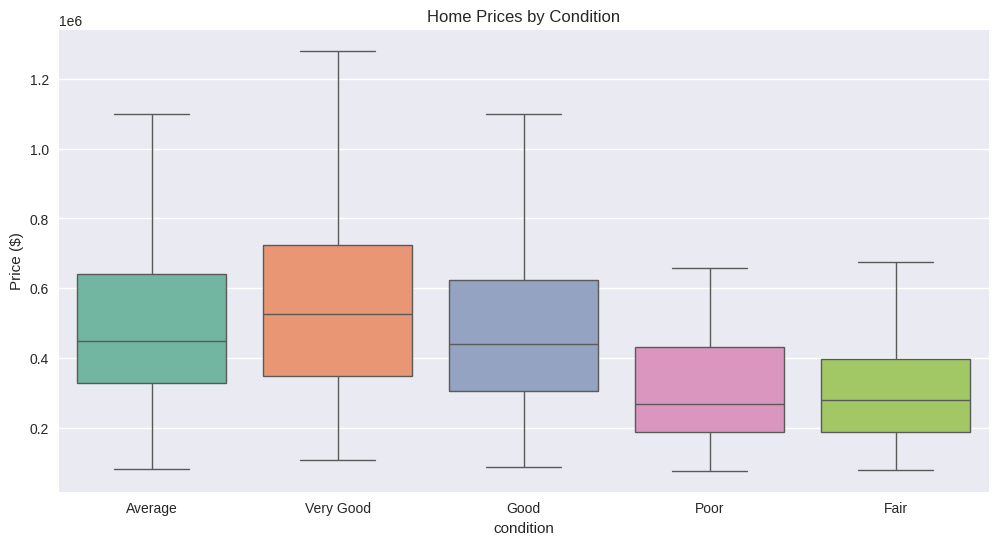

In [177]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_clean, x='condition', y='price', ax=ax, palette='Set2',showfliers=False)
ax.set_title('Home Prices by Condition')
ax.set_ylabel('Price ($)');
#ax.tick_params(axis='y', rotation=90)

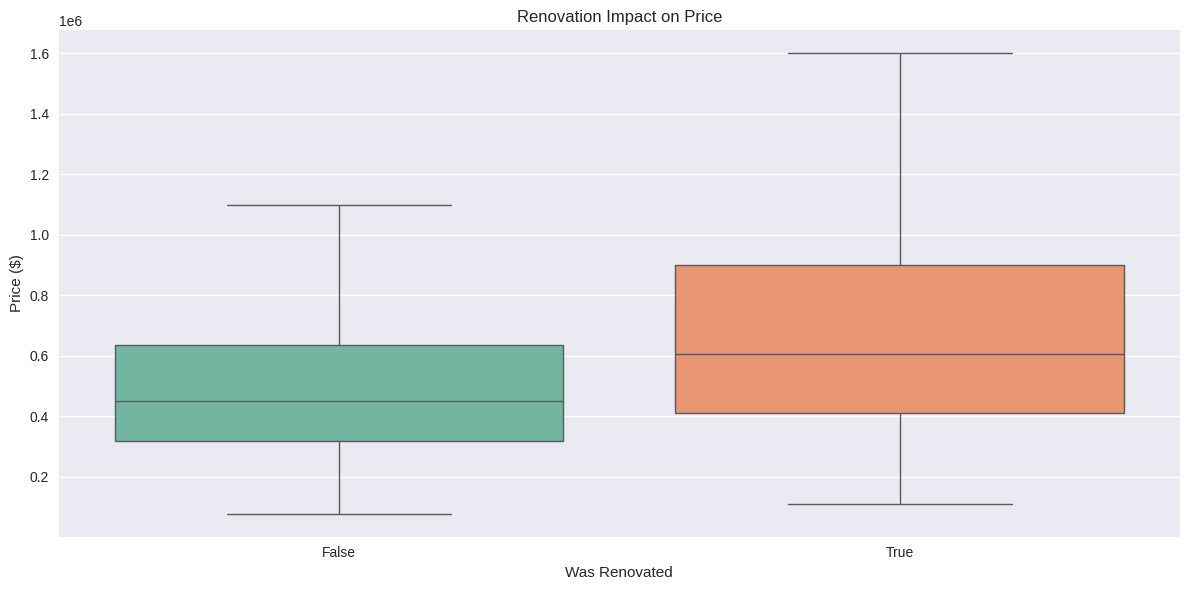

In [151]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_clean, x='was_renovated', y='price', ax=ax, palette='Set2', showfliers=False)
ax.set_title('Renovation Impact on Price')
ax.set_ylabel('Price ($)')
ax.set_xlabel('Was Renovated')
plt.tight_layout()
plt.show()

### Material-Related  Features

In [152]:
view_analysis = df_clean.groupby('view')['price'].agg(['count', 'mean']).round(0)
view_analysis.columns = ['Count', 'Average_Price']
baseline_price = view_analysis['Average_Price'].min()
view_analysis['Price_Premium'] = (((view_analysis['Average_Price'] - baseline_price) /
                                   baseline_price) * 100).round(1)
view_analysis

,Count,Average_Price,Price_Premium
view,,,
AVERAGE,957,791390.0,59.2
EXCELLENT,317,1452466.0,192.1
FAIR,330,813373.0,63.6
GOOD,508,973285.0,95.7
NONE,19485,497211.0,0.0


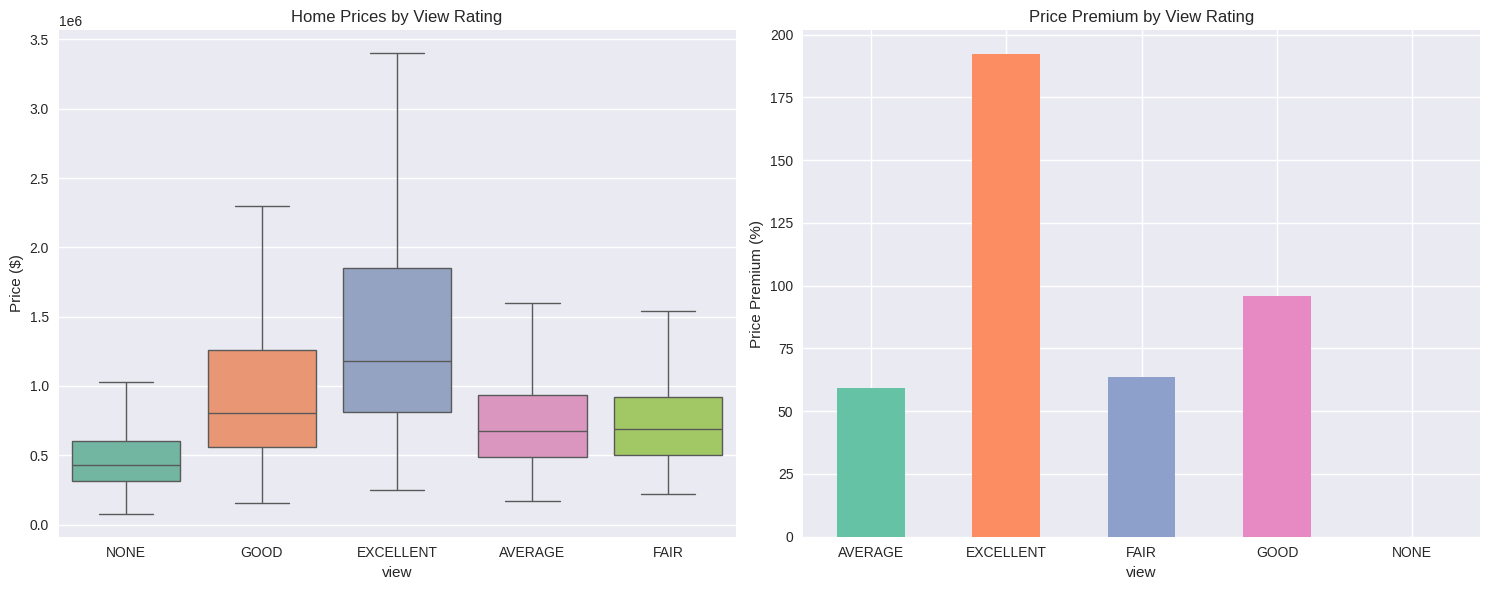

In [180]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

set2_palette = sns.color_palette("Set2")

sns.boxplot(data=df_clean, x='view', y='price', ax=ax1, palette='Set2', showfliers=False)
ax1.set_title('Home Prices by View Rating')
ax1.set_ylabel('Price ($)')

view_analysis['Price_Premium'].plot(kind='bar', ax=ax2, color=set2_palette)
ax2.set_title('Price Premium by View Rating')
ax2.set_ylabel('Price Premium (%)')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [154]:
df_clean['has_basement'] = df_clean['sqft_basement'] > 0
basement_analysis = df_clean.groupby('has_basement')['price'].agg(['count', 'mean']).round(0)
basement_analysis.columns = ['Count', 'Average_Price']
baseline_price = basement_analysis['Average_Price'].min()
basement_analysis['Price_Premium'] = (((basement_analysis['Average_Price'] - baseline_price) /
                                   baseline_price) * 100).round(1)
basement_analysis

,Count,Average_Price,Price_Premium
has_basement,,,
False,13280,488472.0,0.0
True,8317,623047.0,27.6


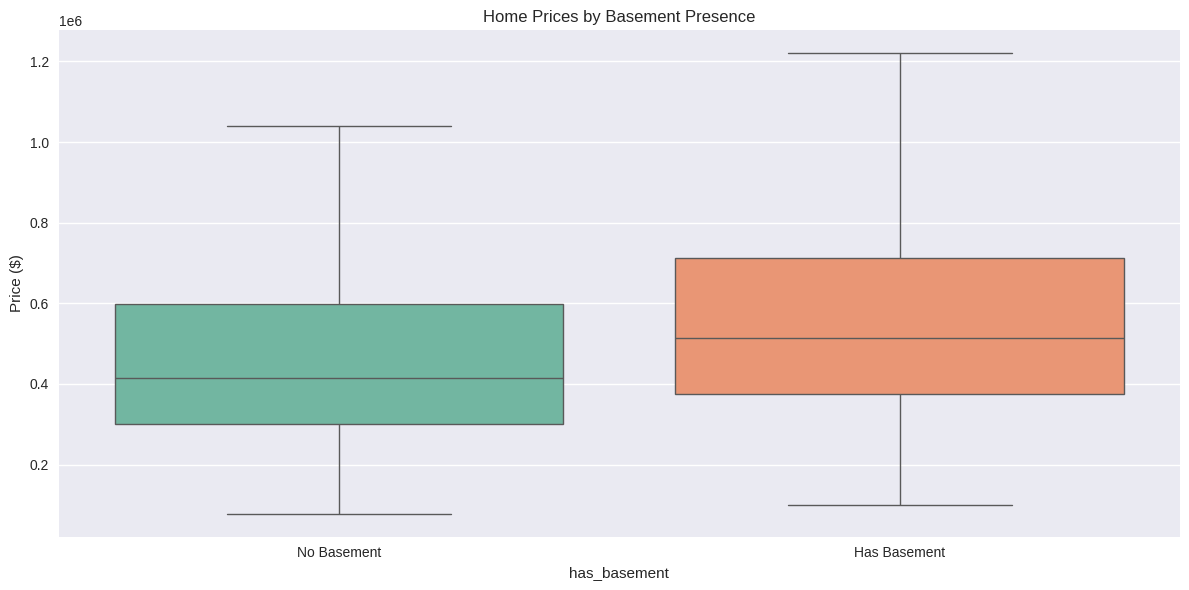

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='has_basement', y='price', palette='Set2', showfliers=False)
plt.title('Home Prices by Basement Presence')
plt.ylabel('Price ($)')

ax = plt.gca()
ax.set_xticklabels(['No Basement', 'Has Basement'])

plt.tight_layout()
plt.show()

In [156]:
waterfront_analysis = df_clean.groupby('waterfront')['price'].agg(['count', 'mean']).round(0)
waterfront_analysis.columns = ['Count', 'Average_Price']
baseline_price = waterfront_analysis['Average_Price'].min()
waterfront_analysis['Price_Premium'] = (((waterfront_analysis['Average_Price'] - baseline_price) /
                                   baseline_price) * 100).round(1)
waterfront_analysis


,Count,Average_Price,Price_Premium
waterfront,,,
0,21451,532286.0,0.0
1,146,1717215.0,222.6


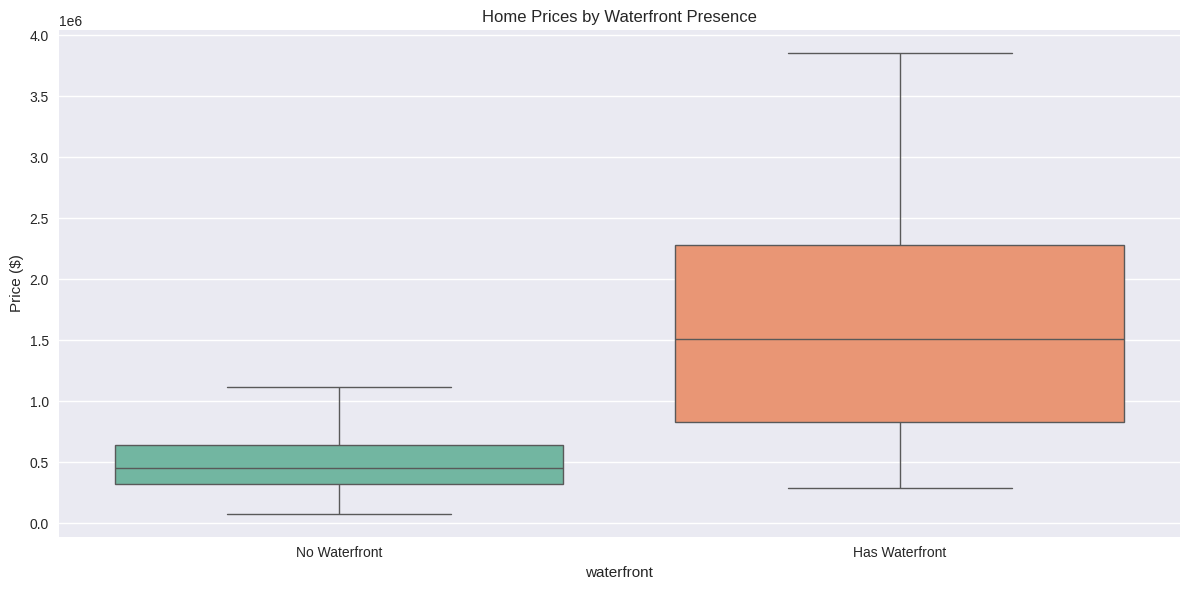

In [157]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='waterfront', y='price', palette='Set2', showfliers=False)
plt.title('Home Prices by Waterfront Presence')
plt.ylabel('Price ($)')

ax = plt.gca()
ax.set_xticklabels(['No Waterfront', 'Has Waterfront'])

plt.tight_layout()
plt.show()

In [158]:
quality_features = ['price', 'grade_numeric', 'sqft_living', 'sqft_basement',
                    'bathrooms', 'floors', 'home_age', 'waterfront', 'was_renovated']
df_clean[quality_features].head()

,price,grade_numeric,sqft_living,sqft_basement,bathrooms,floors,home_age,waterfront,was_renovated
0,221900.0,7,1180,0.0,1.00,1.0,70,0,False
1,538000.0,7,2570,400.0,2.25,2.0,74,0,True
2,180000.0,6,770,0.0,1.00,1.0,92,0,False
3,604000.0,7,1960,910.0,3.00,1.0,60,0,False
4,510000.0,8,1680,0.0,2.00,1.0,38,0,False


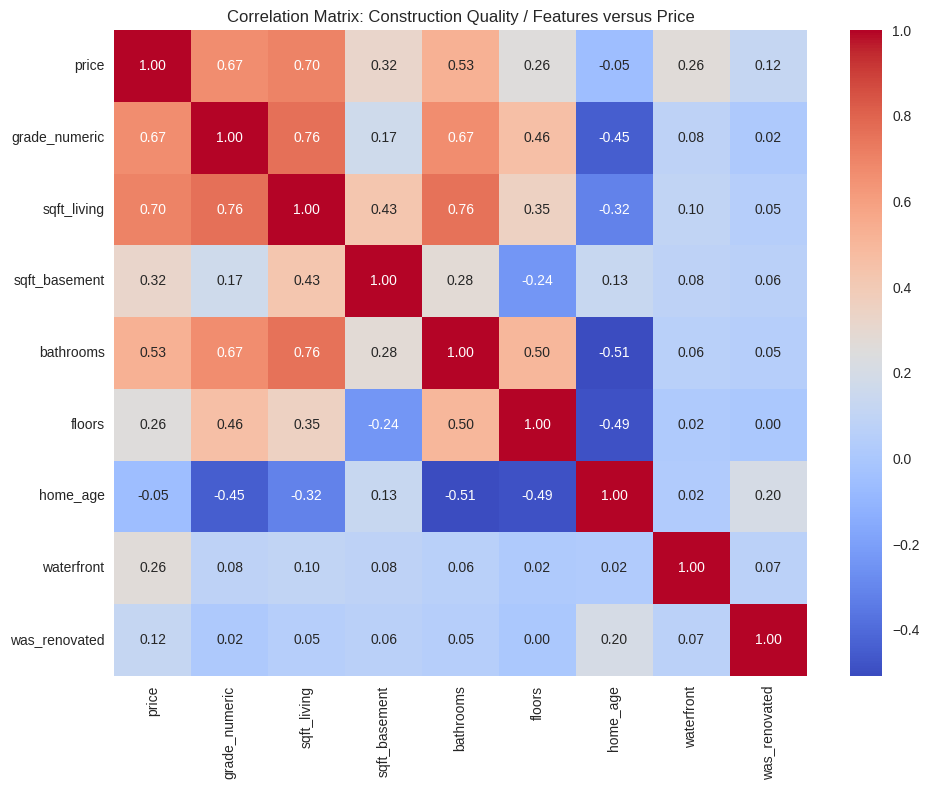

In [159]:
correlation_matrix = df_clean[quality_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Construction Quality / Features versus Price")
plt.tight_layout()
plt.show()

### Statistical Modeling

In [160]:
feature_columns = ['grade_numeric', 'sqft_living', 'sqft_above', 'sqft_basement',
                   'bedrooms','bathrooms', 'floors', 'home_age', 'waterfront', 'was_renovated']

In [161]:
df_model = df_clean.copy()

In [162]:
view_mapping = {'NONE': 0, 'AVERAGE': 1, 'GOOD': 2, 'FAIR': 3, 'EXCELLENT': 4}
conditioning_mapping = {'POOR': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}

In [163]:
df_model['view_numeric'] = df_model['view'].map(view_mapping).fillna(0)
df_model['condition_numeric'] = df_model['condition'].map(conditioning_mapping).fillna(3)
feature_columns.extend(['view_numeric', 'condition_numeric'])

In [164]:
X = df_model[feature_columns]
y = df_model['price']

In [165]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [167]:
# Results dictionary

mode_results = {}

In [168]:
 # Linear Regression Model

 lr_model = LinearRegression()
 lr_model.fit(X_train, y_train)
 y_pred_lr = lr_model.predict(X_test)
 mode_results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
 }

In [169]:
# Random Forest Model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mode_results['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
 }

In [170]:
 # Feature importance from Random Forest

 feature_importance = pd.DataFrame({'feature': X.columns,
                                    'importance': rf_model.feature_importances_}
                                   ).sort_values(by='importance', ascending=False)
print(feature_importance)

              feature  importance
0       grade_numeric    0.355391
1         sqft_living    0.314740
7            home_age    0.128987
2          sqft_above    0.052196
5           bathrooms    0.038546
10       view_numeric    0.027992
3       sqft_basement    0.027766
8          waterfront    0.021779
4            bedrooms    0.017368
6              floors    0.010961
9       was_renovated    0.004274
11  condition_numeric    0.000000


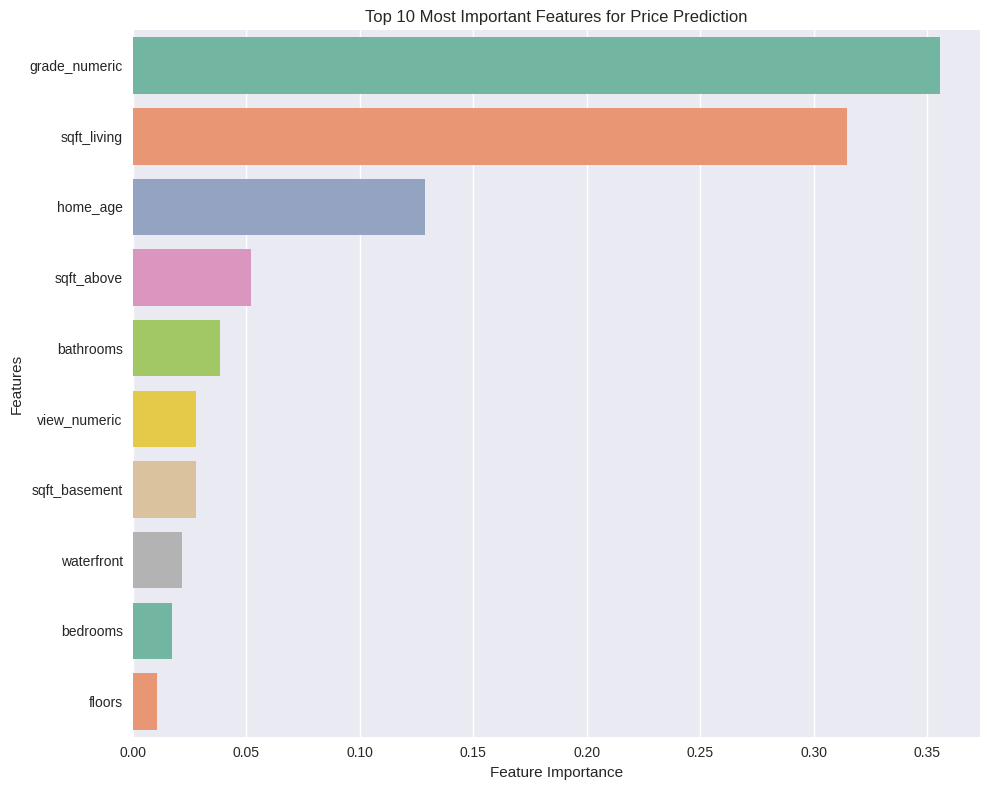

In [171]:
# Visualize

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='Set2')
plt.title('Top 10 Most Important Features for Price Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



In [172]:
# Ridge

feature_cols = ['grade_numeric', 'sqft_living', 'bathrooms', 'bedrooms',
                'floors', 'home_age', 'view_numeric', 'condition_numeric',
                'waterfront', 'has_basement']

X = df_model[feature_cols]
y = df_model['price']

ridge = Ridge(alpha=100.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mode_results['Ridge'] = {
    'R2': r2_score(y_test, y_pred_ridge),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge))
}

In [173]:
# Model Peformances

print(f"Linear Regression R²: {r2_score(y_test, y_pred_lr):.3f}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Ridge R²: {r2_score(y_test, y_pred_ridge):.3f}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr):,.0f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):,.0f}")
print(f"Ridge MAE: {mean_absolute_error(y_test, y_pred_ridge):,.0f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):,.0f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):,.0f}")
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):,.0f}")

Linear Regression R²: 0.637
Random Forest R²: 0.697
Ridge R²: 0.632
Linear Regression MAE: 141,342
Random Forest MAE: 128,796
Ridge MAE: 141,598
Linear Regression RMSE: 217,355
Random Forest RMSE: 198,720
Ridge RMSE: 218,994


In [174]:
# Comparison DataFrame

comparison_df = pd.DataFrame(mode_results).T
comparison_df = comparison_df.round(4)
comparison_df

,R2,MAE,RMSE
Linear Regression,0.6372,141341.6882,217354.5292
Random Forest,0.6967,128796.3018,198720.3293
Ridge,0.6317,141597.6006,218993.9936


In [175]:
# Best Model For Task

best_r2 = comparison_df['R2'].idxmax()
best_mae = comparison_df['MAE'].idxmin()
best_rmse = comparison_df['RMSE'].idxmin()

print("Best Model For Task")
print("")
print(f"Highest R²: {best_r2} ({comparison_df.loc[best_r2, 'R2']:.3f})")
print(f"Lowest MAE: {best_mae} ({comparison_df.loc[best_mae, 'MAE']:,.0f})")
print(f"Lowest RMSE: {best_rmse} ({comparison_df.loc[best_rmse, 'RMSE']:,.0f})")

Best Model For Task

Highest R²: Random Forest (0.697)
Lowest MAE: Random Forest (128,796)
Lowest RMSE: Random Forest (198,720)


# Conclusion

* Construction grade is the primary factor affecting home value. Moving from Grade 7 to Grade 8 typically adds \$140,392 in home value (34.9% increase). Grade 8 homes seem to have the best value retention

* Renovated homes sell for \$236,762 (44.5%) higher on average. You could possibly consider a renovation potential in Grade 6-7 homes

* There is a strong correlation between living space and price. Median price per sqft is \$245, so possibly adding an additional 500 sqft to a home could increase the value by  roughly \$122,322

* Random Forest was the best model with the highest R²: (0.697), Lowest MAE (128,796) and Lowest RMSE (198,720)



## Limitations

- To increase the accuracy of predications some more parameters are needed
- The data set is not current.

## Recommendations

* Focusing on construction quality seems to have the highest impact on value

* Consideration for a renovation potential on homes between Grades 6-7

* Inceasing the size of living space could increase the value of a home since it directly correlates with price




## Next Steps

* Next steps would be to upgrade the overall analysis so it's current since the data set is from 2014 to 2015

* Also maybe incorporating school ratings and crime status to the data set to give a better overall picture of the focus area

* Partnering with contractors and lenders could be a good step in getting more insight for a potential homebuyer


